## imports

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from matplotlib.patches import Ellipse


## Generate and visualize real-looking overlapping data

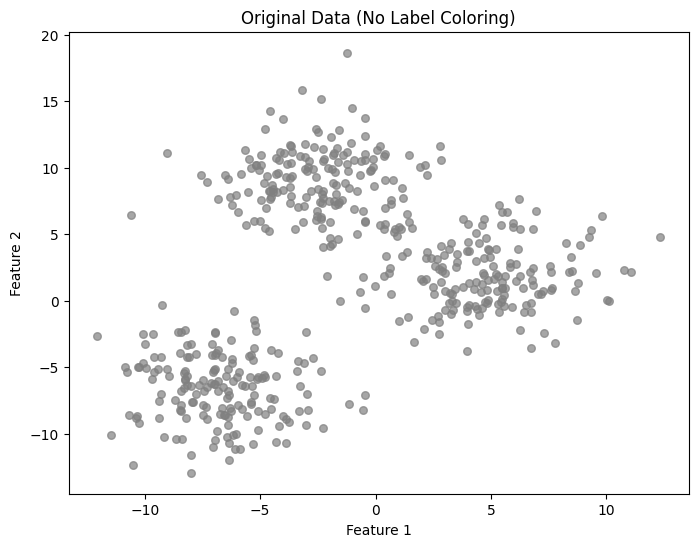

In [12]:
# Generate synthetic overlapping data
np.random.seed(42)
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=[2.5, 2.5, 2.5], random_state=42)

# Visualize original data without labels (all points same color)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='gray', s=30, alpha=0.7)
plt.title("Original Data (No Label Coloring)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Fit Gaussian Mixture Model

In [3]:
# Fit GMM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)

# Predict cluster labels and probabilities
labels = gmm.predict(X)
probs = gmm.predict_proba(X)  # Probability of each point belonging to each cluster


## Define ellipse plotting functions

In [8]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with given position and covariance"""
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, _ = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    for nsig in range(1, 4):  # 1σ, 2σ, 3σ
        ax.add_patch(
            Ellipse(
                xy=position,
                width=nsig * width,
                height=nsig * height,
                angle=angle,
                fill=False,
                **kwargs
            )
        )


## Visualize GMM clustering results

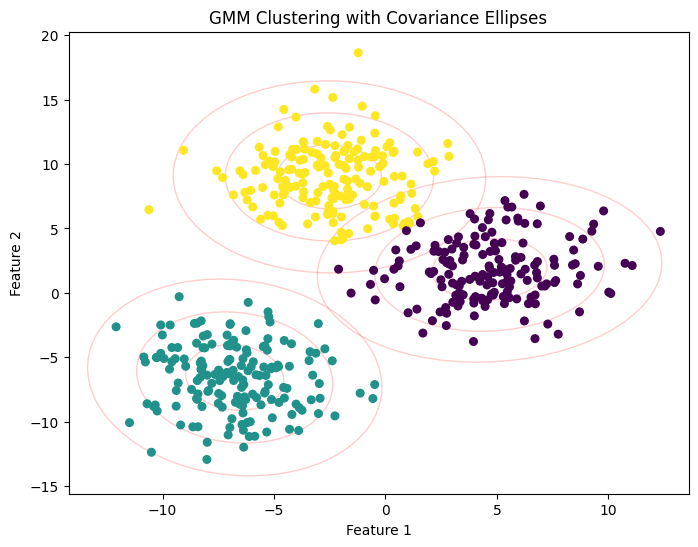

In [9]:
plt.figure(figsize=(8, 6))
plot_gmm(gmm, X, labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Plot probability heatmap for a specific cluster

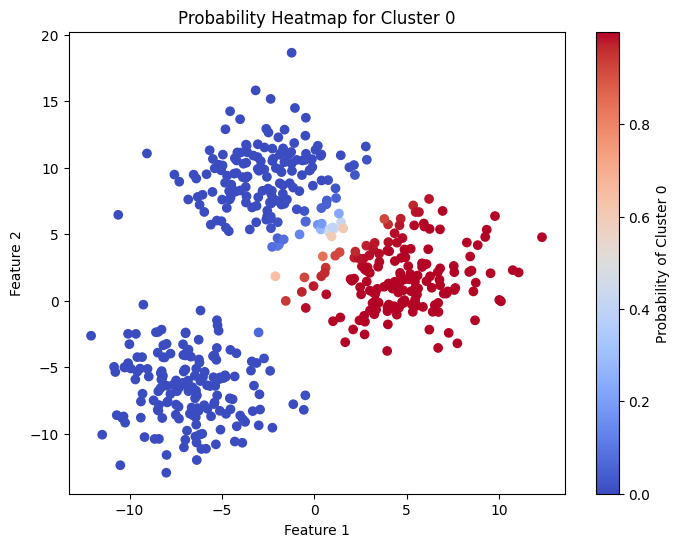

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=probs[:, 0], cmap='coolwarm')
plt.colorbar(label='Probability of Cluster 0')
plt.title("Probability Heatmap for Cluster 0")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Plot membership probability curves

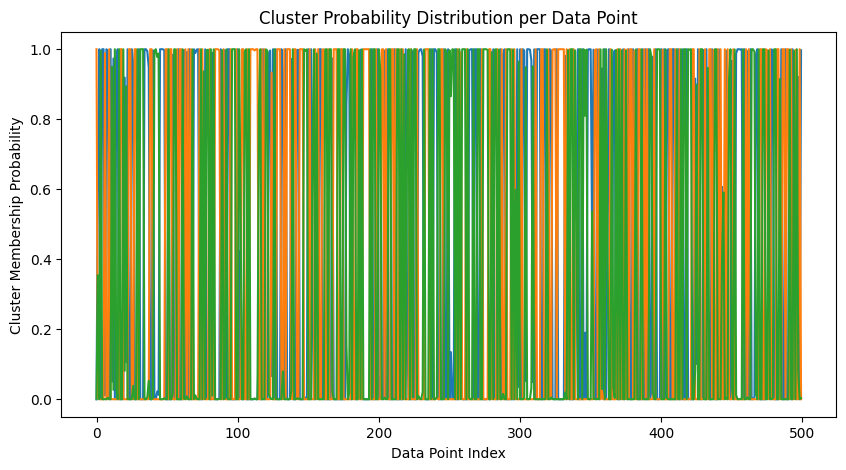

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(probs)
plt.xlabel("Data Point Index")
plt.ylabel("Cluster Membership Probability")
plt.title("Cluster Probability Distribution per Data Point")
plt.show()
